# Pandas CheatSheet

In [3]:
import pandas as pd 

/Users/deepglint/miniconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


DataFrame:

矩阵(二维表)Table，

Tensor张量：

标量-0阶张量-常数

向量-1阶张量-1维数组

矩阵-2阶张量-2维数组-Table

3阶张量-图像-RGB

4阶张量-图像数组-Batch

BGD/SGD/Mini-Batch:

为了更好的梯度下降

Loss的梯度=每一条训练数据的Loss的梯度平均后的结果

使用多少条数据来求平均的梯度？

BGD-全部数据-缺点：慢-优点：梯度最适合本数据集

SGD-只选用1个数据-优点：快-缺点：难以代表整个数据集

MiniBatch-选用n个数据点-可调节，其中n是Batch_Size

注意：当前的学习器中SGD可以代表BGD/SGD/MiniBatch



In [4]:
data0={
    'a':[1,2,3],
    'b':[4,5,6],
    'c':['Bob','Alice','Jack']
}

In [5]:
pd.DataFrame(data0)

,a,b,c
0,1,4,Bob
1,2,5,Alice
2,3,6,Jack


In [6]:
data={'name': ['Alice', 'Bob', 'Charles', 'David', 'Eric'],
        'year': [2017, 2017, 2017, 2017,2017],#2017
        'salary': [40000, 24000, 31000, 20000, 30000],
        'pair':[{'a':1},{'a':2},{'a':3},{'a':4},{'a':5}]
       }

In [7]:
d=pd.DataFrame(data)

In [8]:
d.pair

0    {'a': 1}
1    {'a': 2}
2    {'a': 3}
3    {'a': 4}
4    {'a': 5}
Name: pair, dtype: object

In [9]:
d.name

0      Alice
1        Bob
2    Charles
3      David
4       Eric
Name: name, dtype: object

In [10]:
d['name']

0      Alice
1        Bob
2    Charles
3      David
4       Eric
Name: name, dtype: object

In [11]:
type(d.name)

pandas.core.series.Series

## 薪水大于20000的人都有谁？

query

In [12]:
d

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
3,David,2017,20000,{'a': 4}
4,Eric,2017,30000,{'a': 5}


In [13]:
d.query('salary>20000')

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [14]:
d[d.salary>20000]

,name,year,salary,pair
0,Alice,2017,40000,{'a': 1}
1,Bob,2017,24000,{'a': 2}
2,Charles,2017,31000,{'a': 3}
4,Eric,2017,30000,{'a': 5}


In [15]:
d1=d[d.salary>20000]

### 只获得Eric的信息

In [16]:
d.query('name == "Eric"')

,name,year,salary,pair
4,Eric,2017,30000,{'a': 5}


### 联合查找：名字叫Bob，且薪水大于20000

In [17]:
d.query("name=='Bob' and salary>20000 ")

,name,year,salary,pair
1,Bob,2017,24000,{'a': 2}


## 列操作

select name,year from T where salary>20000 and name='Eric'

.filter()

In [18]:
d.filter(items=['name','year'])

,name,year
0,Alice,2017
1,Bob,2017
2,Charles,2017
3,David,2017
4,Eric,2017


In [19]:
d[['name','year']]

,name,year
0,Alice,2017
1,Bob,2017
2,Charles,2017
3,David,2017
4,Eric,2017


In [20]:
d.query('salary>20000 and name=="Eric"')[['name','year']]

,name,year
4,Eric,2017


### 模糊查找

.filter(like,axis)

In [21]:
d.filter(like='2',axis=0)

,name,year,salary,pair
2,Charles,2017,31000,{'a': 3}


In [22]:
d.filter(like='ala',axis=1)

,salary
0,40000
1,24000
2,31000
3,20000
4,30000


## 分组

.groupby([])

In [23]:
df1 = pd.DataFrame( { 
    "Name" : ["Alice", "Ada", "Mallory", "Mallory", "Billy" , "Mallory"] , 
    "City" : ["Sydney", "Sydney", "Paris", "Sydney", "Sydney", "Paris"]} )

In [24]:
df1

,Name,City
0,Alice,Sydney
1,Ada,Sydney
2,Mallory,Paris
3,Mallory,Sydney
4,Billy,Sydney
5,Mallory,Paris


#### 各个城市都有多少人

In [25]:
df1.groupby(['City']).count()

,Name
City,
Paris,2
Sydney,4


In [26]:
df1.groupby(['City','Name']).count()

Empty DataFrame
Columns: []
Index: [(Paris, Mallory), (Sydney, Ada), (Sydney, Alice), (Sydney, Billy), (Sydney, Mallory)]

## 统计量分析

In [27]:
d.describe()

,year,salary
count,5.0,5.000000
mean,2017.0,29000.000000
std,0.0,7615.773106
min,2017.0,20000.000000
25%,2017.0,24000.000000
50%,2017.0,30000.000000
75%,2017.0,31000.000000
max,2017.0,40000.000000


### 数值统计

In [28]:
import numpy as np 

In [29]:
df2 = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
                   'key2':['one', 'two', 'one', 'two', 'one'],
                   'data1':np.random.randn(5),
                   'data2':np.random.randn(5)})

In [30]:
df2

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
1,a,two,-0.016973,0.066064
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700
4,a,one,0.747989,-0.006254


### 基于属性Key1的类型a和b各自data1和data2的均值和标准差是多少

In [31]:
df2.groupby(['key1']).mean()

,data1,data2
key1,,
a,0.156454,-0.391300
b,-0.096106,-0.082114


In [32]:
df2.groupby(['key1']).std()

,data1,data2
key1,,
a,0.526690,0.730445
b,0.078847,0.069882


### 基于key1和key2的不同组合，data1和data2的均值和标准差

In [33]:
df2.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.243168 -0.619983
     two  -0.016973  0.066064
b    one  -0.151860 -0.131529
     two  -0.040353 -0.032700

### 对于Series的类型直接求sum()

In [34]:
df2.data1.sum()

0.2771498367916348

In [35]:
df2[['data1','data2']].sum()

data1    0.27715
data2   -1.33813
dtype: float64

## 排序

In [36]:
df2.data1.sort_values()

0   -0.261654
2   -0.151860
3   -0.040353
1   -0.016973
4    0.747989
Name: data1, dtype: float64

In [37]:
df2.sort_values(by='data2')

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700
4,a,one,0.747989,-0.006254
1,a,two,-0.016973,0.066064


In [38]:
df2.sort_values(by='key2')

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
2,b,one,-0.151860,-0.131529
4,a,one,0.747989,-0.006254
1,a,two,-0.016973,0.066064
3,b,two,-0.040353,-0.032700


### 多属性的排序

In [39]:
df2.sort_values(by=['key1','key2'])

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
4,a,one,0.747989,-0.006254
1,a,two,-0.016973,0.066064
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700


### 逆序

In [40]:
df2.sort_values(by='data1',ascending=False)

,key1,key2,data1,data2
4,a,one,0.747989,-0.006254
1,a,two,-0.016973,0.066064
3,b,two,-0.040353,-0.032700
2,b,one,-0.151860,-0.131529
0,a,one,-0.261654,-1.233712


## 对于数据的行与列的增删改查

### 数据行选择器

iloc--indexed location

loc-- location(using index name)

In [41]:
df2.iloc[2]

key1            b
key2          one
data1    -0.15186
data2   -0.131529
Name: 2, dtype: object

In [42]:
df2.loc[2]

key1            b
key2          one
data1    -0.15186
data2   -0.131529
Name: 2, dtype: object

In [43]:
df2.groupby(['key1']).count().loc['a']

key2     3
data1    3
data2    3
Name: a, dtype: int64

In [44]:
df2.groupby(['key1']).count().iloc[0]

key2     3
data1    3
data2    3
Name: a, dtype: int64

### 对于cell进行选择

iloc[row,col]

In [45]:
df2.iloc[1,1]

'two'

In [46]:
df2.iloc[:,3]

0   -1.233712
1    0.066064
2   -0.131529
3   -0.032700
4   -0.006254
Name: data2, dtype: float64

In [47]:
df2['data2']

0   -1.233712
1    0.066064
2   -0.131529
3   -0.032700
4   -0.006254
Name: data2, dtype: float64

### 选择df2的前两行

In [48]:
df2.iloc[:2,:]

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
1,a,two,-0.016973,0.066064


### 选择df2的前两行和后两列

In [49]:
df2.iloc[:2,-2:]

,data1,data2
0,-0.261654,-1.233712
1,-0.016973,0.066064


### 数据的修改

.at[row,col]=?

.iat[irow,icol]=?

In [50]:
df2.at[1,'data1']=2

In [51]:
df2

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
1,a,two,2.000000,0.066064
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700
4,a,one,0.747989,-0.006254


In [52]:
df2.iat[1,2]=5

In [53]:
df2

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
1,a,two,5.000000,0.066064
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700
4,a,one,0.747989,-0.006254


### 增加行

.append()

对于DataFrame，每一行代表着一个对象，对象里面每一个属性，与表中的列相对应，所以添加1行其实就是添加1个json

In [54]:
df3=df2.append({'data1':1.2,'data2':2.4,'key1':'c','key2':'three'},ignore_index=True)

In [55]:
df3

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
1,a,two,5.000000,0.066064
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700
4,a,one,0.747989,-0.006254
5,c,three,1.200000,2.400000


In [56]:
df3.loc[6]=['d','two',2,1]

In [57]:
df3

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
1,a,two,5.000000,0.066064
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700
4,a,one,0.747989,-0.006254
5,c,three,1.200000,2.400000
6,d,two,2.000000,1.000000


### 增加列

.assign()

对于DataFrame，一个列代表这所有对象的该列属性的集合，所以添加一个列，使用的是一个数组

In [58]:
df4=df3.assign(key3=[6,5,4,3,2,1,0])

In [59]:
df4.loc[:,'key4']=[5,4,6,2,4,1,0]

In [60]:
df4

,key1,key2,data1,data2,key3,key4
0,a,one,-0.261654,-1.233712,6,5
1,a,two,5.000000,0.066064,5,4
2,b,one,-0.151860,-0.131529,4,6
3,b,two,-0.040353,-0.032700,3,2
4,a,one,0.747989,-0.006254,2,4
5,c,three,1.200000,2.400000,1,1
6,d,two,2.000000,1.000000,0,0


### 删除

.drop([names],axis)

In [61]:
df4.drop(['key4','key3'],axis=1)

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
1,a,two,5.000000,0.066064
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700
4,a,one,0.747989,-0.006254
5,c,three,1.200000,2.400000
6,d,two,2.000000,1.000000


In [62]:
df4.drop([6,5],axis=0)

,key1,key2,data1,data2,key3,key4
0,a,one,-0.261654,-1.233712,6,5
1,a,two,5.000000,0.066064,5,4
2,b,one,-0.151860,-0.131529,4,6
3,b,two,-0.040353,-0.032700,3,2
4,a,one,0.747989,-0.006254,2,4


In [63]:
df4.drop([6,5],axis=0).drop(['key4','key3'],axis=1)

,key1,key2,data1,data2
0,a,one,-0.261654,-1.233712
1,a,two,5.000000,0.066064
2,b,one,-0.151860,-0.131529
3,b,two,-0.040353,-0.032700
4,a,one,0.747989,-0.006254


## 使用Pandas进行数据统计和密度估计

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data3 = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3]}
df3 = pd.DataFrame(data3, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df3

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,Tina,2013,31
Maricopa,Jake,2014,2
Yuma,Amy,2014,3


In [67]:
df3['reports']

Cochice        4
Pima          24
Santa Cruz    31
Maricopa       2
Yuma           3
Name: reports, dtype: int64

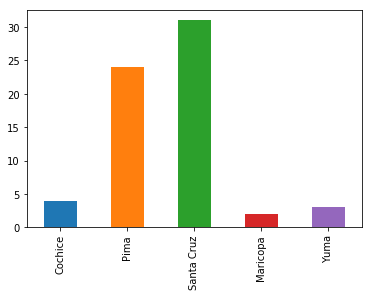

In [68]:
df3['reports'].plot.bar()

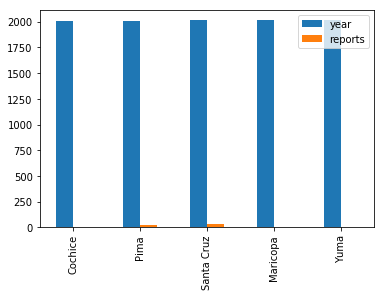

In [69]:
df3.plot.bar()

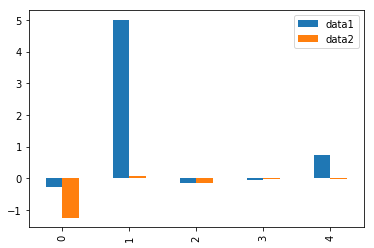

In [71]:
df2.plot.bar()

#### 使用Seaborn对于DataFrame的列进行核密度估计

Kernel Density Estimation

In [73]:
import seaborn as sns

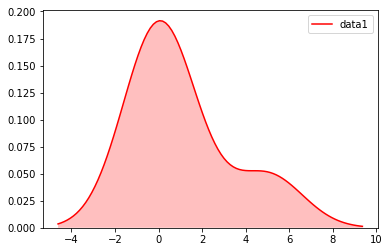

In [74]:
sns.kdeplot(df2['data1'],shade=True,color='r')

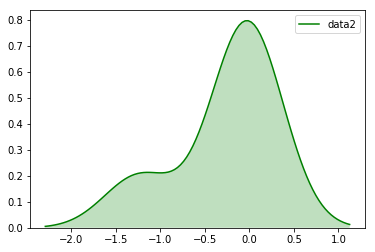

In [76]:
sns.kdeplot(df2['data2'],shade=True,color='g')

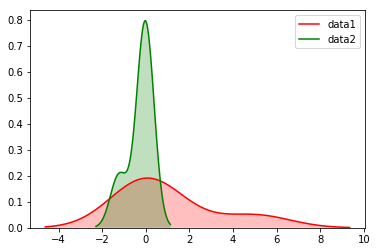

In [77]:
sns.kdeplot(df2['data1'],shade=True,color='r')
sns.kdeplot(df2['data2'],shade=True,color='g')

In [78]:
x=np.random.rand(20)

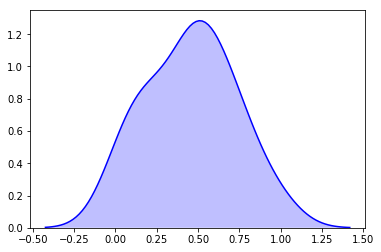

In [80]:
sns.kdeplot(x,shade=True,color='b')

当把20增到的30000的时候，概率密度更倾向于 1.正态分布 2.平均分布

In [81]:
x=np.random.rand(30000)

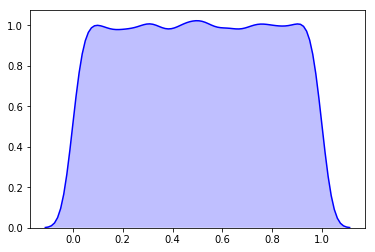

In [82]:
sns.kdeplot(x,shade=True,color='b')